In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from edmAnalyzer import *



import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.optimize import curve_fit

In [ ]:
run = 10
sequence = 2312
offset = 21
number_of_blocks = 8
quantity_of_interest = 'Probe_Y_Drive'
quantity = 'N'

In [32]:
sequence = str(sequence).zfill(4)
run = str(run).zfill(4)

folderpath = r"C:\ACME_analysis\saturation"+run+"."+ sequence 
list_of_target_folders = [folderpath]

xx=hh.headerHandler(list_of_target_folders)



df = xx[[quantity_of_interest]]   # Change this

df.to_csv(folderpath+r"\\"+r"\TiSapph_N_P.csv")
print(len(df))

def touch(folder_path):
    """
    Rename files in the specified folder from xxxx.xxxx.xxxx.bin to xxxx.xxxx.xxxx.0000.bin
    """
    for filename in os.listdir(folder_path):
        if filename.endswith('.bin') and len(filename) == 18 and filename.count('.') == 3:
            # filename is of the form xxxx.xxxx.xxxx.bin
            new_filename = filename.replace('.bin', '.0000.bin')
            source_path = os.path.join(folder_path, filename)
            target_path = os.path.join(folder_path, new_filename)

            if not os.path.exists(target_path):
                os.rename(source_path, target_path)
            else:
                print(f"Collision detected: {target_path} already exists, skipping.")

touch(folderpath)
bdf = pd.DataFrame()
bdf['Polarization Switching XY Swapped'] = [0,0,0,0,0]
NN = []
N = []
AA = []
XX = []
YY = []

for i in range(number_of_blocks):
    a = binCalculator(folderpath+r"\\"+run+"."+sequence + "." + str(i).zfill(4)+r".0000.bin", r"C:\ACMEcode\ACMEanalysis\templates\acmeiii\offsettrace\offsettrace"+str(offset)+r".json", bdf)
    a.default_pipeline()
    NN.append(a.grouped_N_total)
    N.append(a.grouped_N_total)
    AA.append(a.binresult.A)
    XX.append(a.ungrouped_Fx[:,:,:,:].sum(axis = (1,2,3)))
    YY.append(a.ungrouped_Fy[:,:,:,:].sum(axis = (1,2,3)))
AA = np.concatenate(AA)
XX = np.concatenate(XX)
YY = np.concatenate(YY)
NN = [NN[i].sum(axis = -1) for i in range(number_of_blocks)]
#Nratio = np.concatenate([NN[i]/NN[i].sum(axis = -2, keepdims = True) for i in range(number_of_blocks)])

#Nratio = np.save(folderpath + r"\Nratio.npy", Nratio)
np.save(folderpath + r"\AA.npy", AA)

256


In [33]:
df['YY'] = YY

C:\Users\ACME\AppData\Local\Temp\ipykernel_25788\2412651200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YY'] = YY


In [34]:
df

,Probe_Y_Drive,YY
0,0.270903,1.653819e+07
1,0.144774,1.468520e+07
2,0.218968,1.653986e+07
3,0.174452,1.591263e+07
4,0.152194,1.526494e+07
...,...,...
251,0.196710,8.847663e+06
252,0.152194,8.460061e+06
253,0.122516,7.323275e+06
254,0.218968,9.113640e+06


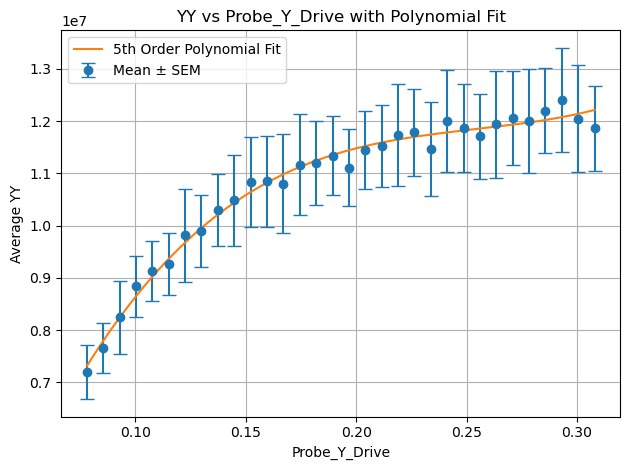

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group data
grouped = df.groupby('Probe_Y_Drive')['YY'].agg(['mean', 'std', 'count']).reset_index()
grouped['sem'] = grouped['std'] / np.sqrt(grouped['count'] - 1)

# Fit 5th-order polynomial
x = grouped['Probe_Y_Drive'].values
y = grouped['mean'].values
coeffs = np.polyfit(x, y, deg=3)
poly_fit = np.poly1d(coeffs)

# Generate smooth x values for plotting the polynomial
x_fine = np.linspace(x.min(), x.max(), 500)
y_poly = poly_fit(x_fine)

# Plot
plt.errorbar(x, y, yerr=grouped['sem'], fmt='o', capsize=5, label='Mean ± SEM')
plt.plot(x_fine, y_poly, '-', label='5th Order Polynomial Fit')
plt.xlabel('Probe_Y_Drive')
plt.ylabel('Average YY')
plt.title('YY vs Probe_Y_Drive with Polynomial Fit')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
